In [1]:
import os

In [2]:
os.chdir('D:\Machine Learning')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
dataset = pd.read_csv('Salary_Data.csv')

In [5]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Now check the relationship between yearsexperience and salary


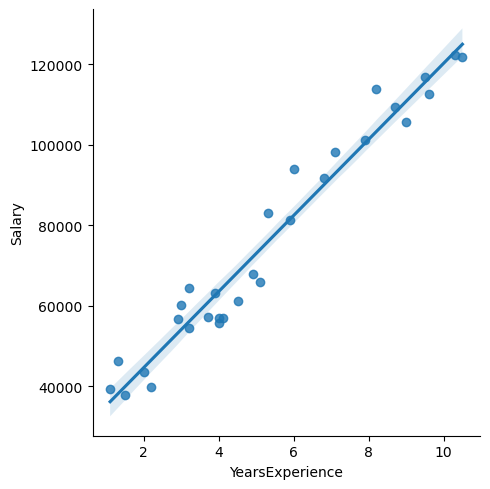

In [7]:
sns.lmplot(data = dataset, x='YearsExperience', y= 'Salary')

By the above graph we can say that the data is linear. Now we can check how much the relationship is +(ve). For that we calculate Karl Pearson's coefficient of correlation

In [8]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


so the Karl Pearson's coefficient of correlation (r) for the relationship between YearsExperience and Salary is 0.978

In [9]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Now we divide the above dataset in two parts i.e. x and y, because whenever we are making a model we have to split the data in x's and y's.  

In [13]:
x = dataset.iloc[:,0:1].values

In [14]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [19]:
y = dataset.iloc[:,-1].values

In [20]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Now breaking x and y into training dataset and testing dataset

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=10)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [35]:
regressor.coef_

array([9303.95933197])

In [36]:
regressor.intercept_

27206.42890292858

In [37]:
regressor.predict(x_test)

array([ 90473.3523603 ,  56979.09876522,  54187.91096563,  41162.36790088,
        45814.34756686,  93264.54015989,  65352.66216399, 116524.43848981,
        64422.2662308 ])

Now if any new data comes in the model if will predicts the values as per the training data


In [39]:
new_data = pd.read_excel('prediction_new.xlsx')

In [40]:
new_data

,Years of exp
0,13
1,14
2,15
3,16
4,0


In [41]:
x_new = new_data.iloc[:,0:1].values

In [42]:
x_new

array([[13],
       [14],
       [15],
       [16],
       [ 0]], dtype=int64)

In [43]:
regressor.predict(x_new)

array([148157.9002185 , 157461.85955047, 166765.81888243, 176069.7782144 ,
        27206.42890293])

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, regressor.predict(x_test))

0.9647278344670828